

##  Load and examine the auto dataset. 

  

FYI column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf): 
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


1. I dropped 'origin', and 'name' column since they are two columns contains object value and it is unncessary for me to use in the following models. 
2. Numeric value column: mpg, horsepower, displacement, weight, acceleration. Categorical column: cylinders, year, origin, name.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Auto.csv to Auto.csv


In [3]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Auto.csv']))
print(df)
df.head()

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle ma

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.drop(['origin', 'name'], axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82
393,44.0,4,97.0,52,2130,24.6,82
394,32.0,4,135.0,84,2295,11.6,82
395,28.0,4,120.0,79,2625,18.6,82


In [5]:
import pandas as pd
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


##  Scatter and explore. 


1. Done as show below
2. A car has more horsepower, it tend to have lower mpg.
A car has more horsepower, it tend to have more weight.



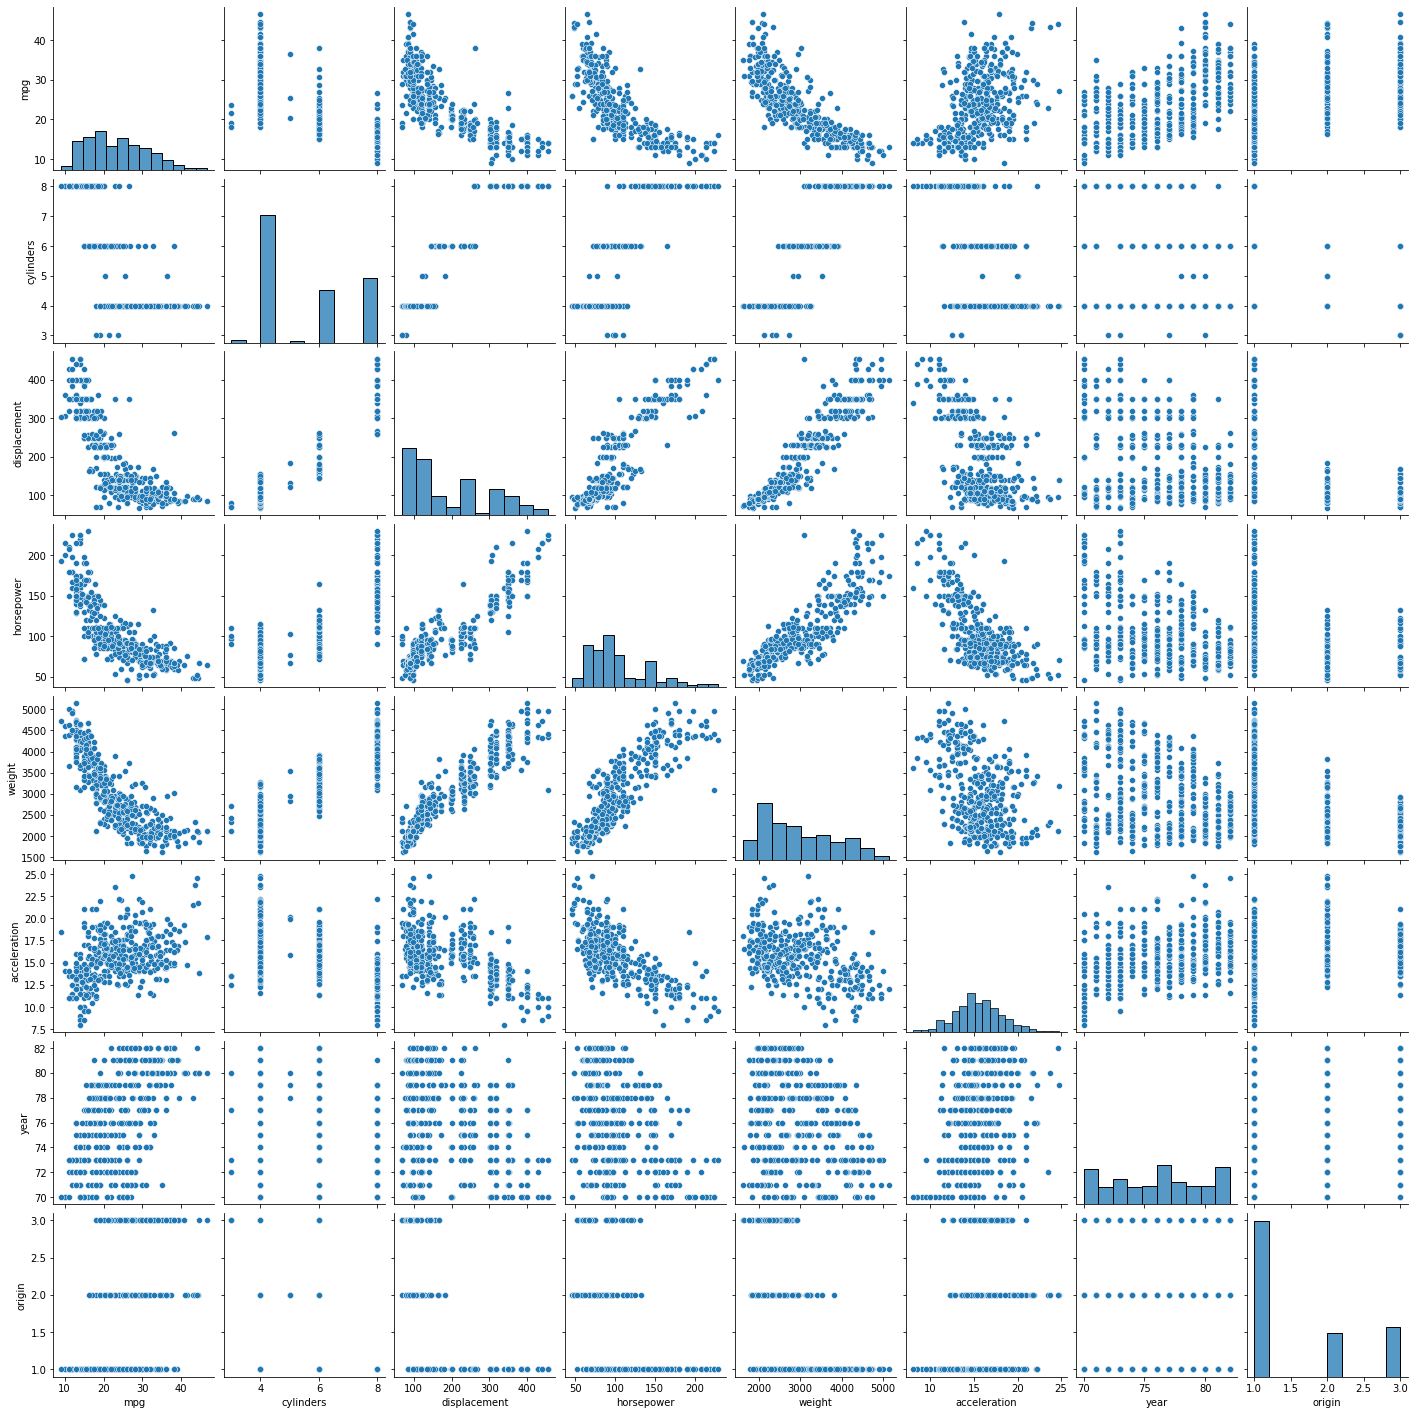

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

## Compute the correlation matrix among the numeric variables. 

The highest coef is .95 which is between cylinders and displacement. It indicate the more cylinder a car have, the more displacement it will have.

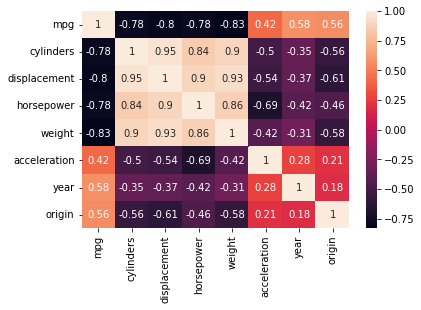

In [7]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Use `statsmodels` to regress mpg on all other variables. 

1. There are 3 significant variable which are weight and year. The p value of these two variable is 0.000. It's value is so small that can't show in the model. The coef for year against mpg is 0.75 which indicate positive relationship between mpg and year. So the newer car have lower mpg. It is relevant to our common sense since newer car have better technology. The coef for weight against mpg is -0.0068 which shows a negative relationship between mpg and weight. It indicate the lighter the car get, it more mpg the car have. All of the cylinder are significant 
2. Horsepower, acceleration, and displacement are the variables don't have a significant effect, since their p-value is greater than 0.05. Acceleration has higher chance doesn't have effect on mpg since acceleration doesn't correlate to mpg. 
3. If treat year as numerical value, the model will give us the answer that it is not a significant effect. However, if we treat year as categorical, then we will realize some year has significant effect on mpg, so doesn't.

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
model_1_df = df[["mpg", "cylinders", "displacement","horsepower","weight","acceleration","year"]].copy()
model_1_df.dropna(inplace=True)

In [9]:
model_1 = ols(formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year", data=model_1_df)
model_1_results = model_1.fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          3.79e-135
Time:                        14:17:11   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.5353      4.764     -3.051      0.002     -23.902      -5.169
cylinders       -0.3299      0.332     -0.993      0.321      -0.983       0.323
displacement     0.0077      0.007      1.044      0.297      -0.007       0.022
horsepower      -0.0004      0.014     -0.028      0.977      -0.028       0.027
weight          -0.0068      0.001    -10.141      0.000      -0.008      -0.005
acceleration     0.0853      0.102      0.836      0.404      -0.115       0.286
year             0.7534      0.053     14.318      0.000       0.650       0.857
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_1 = ols(formula="mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(year)", data=model_1_df)
model_1_results = model_1.fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.16e-148
Time:                        14:19:02   Log-Likelihood:                -966.23
No. Observations:                 392   AIC:                             1974.
Df Residuals:                     371   BIC:                             2058.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            33.0722      2.375     13.922      0.000      28.401      37.743
C(cylinders)[T.4]     6.6241      1.555      4.260      0.000       3.566       9.682
C(cylinders)[T.5]     7.1688      2.341      3.062      0.002       2.565      11.772
C(cylinders)[T.6]     3.9866      1.741      2.290      0.023       0.564       7.409
C(cylinders)[T.8]     6.7480      2.011      3.355      0.001       2.793      10.703
C(year)[T.71]         0.9686      0.834      1.161      0.246      -0.672       2.609
C(year)[T.72]        -0.5292      0.822     -0.644      0.520      -2.146       1.087
C(year)[T.73]        -0.4626      0.740     -0.625      0.532      -1.918       0.993
C(year)[T.74]         1.3199      0.873      1.512      0.131      -0.397       3.037
C(year)[T.75]         1.0245      0.856      1.197      0.232      -0.659       2.708
C(year)[T.76]         1.5265      0.821      1.858      0.064      -0.089       3.142
C(year)[T.77]         2.9408      0.836      3.518      0.000       1.297       4.585
C(year)[T.78]         2.9293      0.793      3.693      0.000       1.369       4.489
C(year)[T.79]         4.6555      0.841      5.537      0.000       3.002       6.309
C(year)[T.80]         9.4257      0.886     10.640      0.000       7.684      11.168
C(year)[T.81]         6.6049      0.870      7.596      0.000       4.895       8.315
C(year)[T.82]         7.5281      0.851      8.850      0.000       5.855       9.201
displacement          0.0011      0.006      0.173      0.863      -0.012       0.014
horsepower           -0.0273      0.013     -2.077      0.038      -0.053      -0.001
weight               -0.0054      0.001     -8.597      0.000      -0.007      -0.004
acceleration          0.0155      0.089      0.174      0.862      -0.160       0.191
==============================================================================
Omnibus:                       33.371   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.544
Skew:                           0.509   Prob(JB):                     2.62e-14
Kurtosis:                       4.672   Cond. No.                     7.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##   two way interactions between a numeric and categorical variable in three different regression models 


I did three separate models for two way interactions: horsepower against year, acceleration against year and weight against year. 
For the first model, horsepower against year, there are some two interaction appear significant. For year between year 78 to 82, those appear significant. Their coef are also negative.
For the second model, there is only one two way interaction appears significant which is the year of 82.
For the third model, it is relevant to the first model. Between year 78 to 82, the two way interaction appear significant.

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model_1 =smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(year) + horsepower*C(year)', df).fit()
print(model_1.summary().tables[1])

                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   32.5702      2.451     13.288      0.000      27.750      37.390
C(cylinders)[T.4]            5.9929      1.450      4.133      0.000       3.141       8.845
C(cylinders)[T.5]            6.3006      2.189      2.878      0.004       1.995      10.606
C(cylinders)[T.6]            4.7338      1.634      2.897      0.004       1.520       7.948
C(cylinders)[T.8]            7.1009      1.901      3.734      0.000       3.362      10.840
C(year)[T.71]                0.2344      2.256      0.104      0.917      -4.202       4.671
C(year)[T.72]               -2.1771      2.271     -0.959      0.338      -6.644       2.290
C(year)[T.73]               -3.6493      2.004     -1.821      0.069      -7.590       0.292
C(year)[T.74]                2.7800      2.437      1.141      0.255  

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model_1 =smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(year) + acceleration*C(year)', df).fit()
print(model_1.summary().tables[1])

                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     36.7453      3.245     11.324      0.000      30.364      43.127
C(cylinders)[T.4]              7.0175      1.532      4.581      0.000       4.005      10.030
C(cylinders)[T.5]              7.4715      2.303      3.244      0.001       2.942      12.001
C(cylinders)[T.6]              4.7887      1.725      2.776      0.006       1.396       8.182
C(cylinders)[T.8]              7.6433      2.008      3.806      0.000       3.694      11.592
C(year)[T.71]                  1.8879      4.124      0.458      0.647      -6.223       9.999
C(year)[T.72]                  3.8315      3.779      1.014      0.311      -3.601      11.264
C(year)[T.73]                  4.6784      3.334      1.403      0.161      -1.877      11.234
C(year)[T.74]                 -7.5256      6.096  

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model_1 =smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(year) + weight*C(year)', df).fit()
print(model_1.summary().tables[1])

                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               29.9308      2.841     10.537      0.000      24.345      35.517
C(cylinders)[T.4]        5.6119      1.469      3.821      0.000       2.723       8.501
C(cylinders)[T.5]        7.3247      2.207      3.319      0.001       2.985      11.665
C(cylinders)[T.6]        3.8811      1.644      2.361      0.019       0.649       7.114
C(cylinders)[T.8]        6.3953      1.910      3.348      0.001       2.639      10.152
C(year)[T.71]            1.3828      2.739      0.505      0.614      -4.003       6.769
C(year)[T.72]           -1.3494      2.877     -0.469      0.639      -7.008       4.309
C(year)[T.73]           -4.4726      2.704     -1.654      0.099      -9.791       0.845
C(year)[T.74]            3.7008      2.788      1.328      0.185      -1.781       9.183
C(year)[T.75]        

## Measure the in-sample and out of sample $R^2$ of the model estimated in previous cell using 20% data for testing.

in-sample r-square: 0.87
out-of-sample r-square: 0.88

In [14]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 318
No. of testing examples: 79


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

D_train, D_test = train_test_split(df, test_size = .2, random_state=0)

est = smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(year) ', df).fit()
print(est.summary())

print('in-sample r-square: {:.2f}'.format(est.rsquared))
predictions = est.predict(D_test) 
print('out-of-sample r-square: {:.2f}'.format(r2_score(D_test.mpg, predictions)))

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.16e-148
Time:                        14:18:17   Log-Likelihood:                -966.23
No. Observations:                 392   AIC:                             1974.
Df Residuals:                     371   BIC:                             2058.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            33.0722      2.37